# Algorithm Project 1 - Searching Algorithm

In our project, we designed 2 different algorithms for the searching of genome sequence in a long string of nucleic acid sequence, with reference to Finite-State Machine (FSM) and Polynomial Hashing in comparison to brute-force algorithm given. We will analyse and compare the 3 algorithms in terms of time complexity and space complexity.

### Group Members
* Li Haocheng (U1921700J)
* Joey Lim Soo Yee (U1921745L)
* Josephine Agatha Hemingway (U1920309C)
* Kenn Lim Zheng Jie (U1921807J)
* Shannon Kate Wong Carlynn (U1921906D)
* Leong Hao Zhi (1920469K)

### Table of Contents
- Importing dataset and relevant modules
- Data preprocessing


1. Brute-force Searching Algorithm
2. Finite-State Machine (FSM) Searching Algorithm
3. Polynomial Hashing Searching Algorithm



- Comparison of the 3 algorithms
- Conclusion

## Importing dataset and relevant modules

In [1]:
# importing some relevant modules
import numpy as np
import timeit
import matplotlib.pyplot as plt
import string

In [2]:
file = open("sequence.fasta")
temp = file.read().splitlines()

In [3]:
temp

['>NC_045512.2 Severe acute respiratory syndrome coronavirus 2 isolate Wuhan-Hu-1, complete genome',
 'ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAA',
 'CGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCATGCTTAGTGCACTCACGCAGTATAATTAATAAC',
 'TAATTACTGTCGTTGACAGGACACGAGTAACTCGTCTATCTTCTGCAGGCTGCTTACGGTTTCGTCCGTG',
 'TTGCAGCCGATCATCAGCACATCTAGGTTTCGTCCGGGTGTGACCGAAAGGTAAGATGGAGAGCCTTGTC',
 'CCTGGTTTCAACGAGAAAACACACGTCCAACTCAGTTTGCCTGTTTTACAGGTTCGCGACGTGCTCGTAC',
 'GTGGCTTTGGAGACTCCGTGGAGGAGGTCTTATCAGAGGCACGTCAACATCTTAAAGATGGCACTTGTGG',
 'CTTAGTAGAAGTTGAAAAAGGCGTTTTGCCTCAACTTGAACAGCCCTATGTGTTCATCAAACGTTCGGAT',
 'GCTCGAACTGCACCTCATGGTCATGTTATGGTTGAGCTGGTAGCAGAACTCGAAGGCATTCAGTACGGTC',
 'GTAGTGGTGAGACACTTGGTGTCCTTGTCCCTCATGTGGGCGAAATACCAGTGGCTTACCGCAAGGTTCT',
 'TCTTCGTAAGAACGGTAATAAAGGAGCTGGTGGCCATAGTTACGGCGCCGATCTAAAGTCATTTGACTTA',
 'GGCGACGAGCTTGGCACTGATCCTTATGAAGATTTTCAAGAAAACTGGAACACTAAACATAGCAGTGGTG',
 'TTACCCGTGAACTCATGCGTGAGCTTAACGGAGGGGCATACACTCGCTATGTCGATAACAACTTCTGTGG',

## Data Preprocessing
### Defining our main DNA string and target gene sequence string

In [4]:
#remove 
temp.pop(0)

'>NC_045512.2 Severe acute respiratory syndrome coronavirus 2 isolate Wuhan-Hu-1, complete genome'

In [5]:
st = [char.upper() for char in temp]
st = ''.join(st)
st

'ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCATGCTTAGTGCACTCACGCAGTATAATTAATAACTAATTACTGTCGTTGACAGGACACGAGTAACTCGTCTATCTTCTGCAGGCTGCTTACGGTTTCGTCCGTGTTGCAGCCGATCATCAGCACATCTAGGTTTCGTCCGGGTGTGACCGAAAGGTAAGATGGAGAGCCTTGTCCCTGGTTTCAACGAGAAAACACACGTCCAACTCAGTTTGCCTGTTTTACAGGTTCGCGACGTGCTCGTACGTGGCTTTGGAGACTCCGTGGAGGAGGTCTTATCAGAGGCACGTCAACATCTTAAAGATGGCACTTGTGGCTTAGTAGAAGTTGAAAAAGGCGTTTTGCCTCAACTTGAACAGCCCTATGTGTTCATCAAACGTTCGGATGCTCGAACTGCACCTCATGGTCATGTTATGGTTGAGCTGGTAGCAGAACTCGAAGGCATTCAGTACGGTCGTAGTGGTGAGACACTTGGTGTCCTTGTCCCTCATGTGGGCGAAATACCAGTGGCTTACCGCAAGGTTCTTCTTCGTAAGAACGGTAATAAAGGAGCTGGTGGCCATAGTTACGGCGCCGATCTAAAGTCATTTGACTTAGGCGACGAGCTTGGCACTGATCCTTATGAAGATTTTCAAGAAAACTGGAACACTAAACATAGCAGTGGTGTTACCCGTGAACTCATGCGTGAGCTTAACGGAGGGGCATACACTCGCTATGTCGATAACAACTTCTGTGGCCCTGATGGCTACCCTCTTGAGTGCATTAAAGACCTTCTAGCACGTGCTGGTAAAGCTTCATGCACTTTGTCCGAACAACTGGACTTTATTGACACTAAGAGGGGTGTATACTGCTGCCGTGAACATGAGCATGAAATTGCTTGGTACACGGAACGTTC

In [6]:
# our target substring that we are searching for
sst = "TTTATACCTTCC"

## 1. Brute Force Searching Algorithm

In [7]:
#starting runtime calculation for Brute Force Algorithm
start_bf = timeit.default_timer()

def bf(st,sst):
    lst=len(st)
    lsst=len(sst)
    res = []
    for i in range(lst-lsst+1):
        for j in range (lsst):
            if st[i+j] != sst[j]:
                break
        if st[i+j] == sst[j] and j == lsst-1:
            res.append(i)        
    print("The target string is found at index :", res)

    
bf(st,sst)

stop_bf = timeit.default_timer()
elapsed_bf = stop_bf - start_bf
print('Total runtime for Brute Force Searching Algorithm: ', elapsed_bf)  

The target string is found at index : [8]
Total runtime for Brute Force Searching Algorithm:  0.062325599999999426


## 2. Finite State Machine (FSM) Searching Algorithm
### Constructing the FSM & searching with FSM

In [8]:
start_fsm = timeit.default_timer()

def construct_FSM(sst):
    states = {}
    #states is made a dictionary to reduce search time.
    #The keys are name of the states and the values are another dictionary.
    #the keys of this new dictionary are the letters on the arrow, and the values corresponding to the new states to move into.
    seen = []
    #only letters that has appeared before are possible as the letter on the arrows.
    #make a list of seen letters to reduce time complexity
    lsst = len(sst)
    for i in range(lsst+1):
        old_key = sst[:i]
        if i<lsst:
            c = sst[i]
            new_key = old_key + c 
        else:
            c = sst[0]
        #new_key in the current loop is the old_key in the previous loop
        states[new_key] = {}
        if old_key and i<lsst:  
        #in the first loop old_key is empty hence this will not run.
            states[old_key][c] = new_key 
            #make the forward arrows
        elif old_key and i==lsst:  
            states[old_key][c] = c
            #if already at final state, go back to state 1 when next character is st[0]    
        if i<lsst:
            for s in seen: 
            #do not consider letters that has not appeared in the previous loop to save time
                if s == c:
                    continue
                nk = old_key + s
                for j in range(1, i+1):
                    if nk[j:] in states:
                        states[old_key][s] = nk[j:] #make the backward arrows
                        break
            if c not in seen:
                seen.append(c)
            # Record the letters we have seen
    return states
     
def search_FSM(st,sst):
    i = 0
    states = construct_FSM(sst)
    current_state = ''
    lst = len(st)
    lsst = len(sst)
    res = []
    while i < lst:
        if current_state:
            current_state = states[current_state][st[i]] if st[i] in states[current_state] else ''
        else:
            current_state = st[i] if st[i] in states else ''
        i+=1
        if current_state == sst:
            i -= (lsst-1)
            res.append(i-1)
        
    return res

print("The target string is found at index(es) ", search_FSM(st,sst))

stop_fsm = timeit.default_timer()
elapsed_fsm = stop_fsm - start_fsm
print('Total runtime for FSM searching algorithm: ', elapsed_fsm)


The target string is found at index(es)  [8]
Total runtime for FSM searching algorithm:  0.03138030000000036


In [9]:
construct_FSM('ATCATA')

{'A': {'T': 'AT', 'A': 'A'},
 'AT': {'C': 'ATC', 'A': 'A'},
 'ATC': {'A': 'ATCA'},
 'ATCA': {'T': 'ATCAT', 'A': 'A'},
 'ATCAT': {'A': 'ATCATA', 'C': 'ATC'},
 'ATCATA': {'A': 'A'}}

## 3. Polynomial Rolling Hash Searching Algorithm

### 3.1 Finding the 4 unique DNA bases & assigning index to each DNA base

Since we have 4 alphabets ACGT, we index them from 1 to 4 (indexing: A: 1, C:2, G:3, T:4).

In [10]:
start1 = timeit.default_timer()

find_char = []
for char in st:
    if char not in find_char:
        find_char.append(char)

#sorting in alphabetical order
sort_char = sorted(find_char)

assign_values = {c: i for i , c in enumerate(sort_char, 1)}
print(assign_values)


stop1 = timeit.default_timer()
elapsed_1 = stop1 - start1
print('Time: ', elapsed_1)

{'A': 1, 'C': 2, 'G': 3, 'T': 4}
Time:  0.012982700000000236


### 3.2 Finding the Polynomial Sum of the substring

Here, we calculate the summation of the target string: alphabet index (1-4) to the power of the index (0-11 since we have 12 bases in our target string). In our algorithm, we take our factor to be 10. 

Our target string will look like this:
TTTATACCTTCC (444141224422)

So here, the target string will be 4x10^11 + 4x10*10 + 4x10^9 +...

In [11]:
start2 = timeit.default_timer()

# Defining a function to calculate polynomial sum
def value(line):
    length = len(sst) -1
    factor = 10 ** length
    target_sum = 0;
    for i in line:
        target_sum = assign_values[i] * factor + target_sum
        factor /= 10
    return int(target_sum)

# Calculating the polynomial sum of the target string
target_sum = value(sst)
print("Polynomial sum of target string is: ",target_sum)

stop2 = timeit.default_timer()
elapsed_2 = stop2 - start2
print('Time: ', elapsed_2)

Polynomial sum of target string is:  444141224422
Time:  0.0020068999999995896


### 3.3 Creating the hash table

In [12]:
start3 = timeit.default_timer()

# Function to insert hash keys and value into the hash table
# key is the sum of polynomial
# value is the index of the substring
def insert(hash_table, sumvalue, index):
    hash_key = sumvalue
    hash_table[hash_key] = index

# Creating our hash table
hash_table = {}

# Creating the rolling hash table function
def create_hash(st, sst, hash_table_name): 
    lst = len(st)
    lsst = len(sst)
    t = value(st[0:lsst]) 
    factor = 10
    
    for i in range(lst-lsst):
        insert(hash_table_name, t, i)
        t=(t-assign_values[st[i]]*(factor**(lsst-1)))*10 + assign_values[st[i+lsst]]
        
# Creating hash table
create_hash(st, sst, hash_table)

# Searching target string from hash table
def search_hash(sst_value, hash_table_name):
    if sst_value in hash_table_name:
        print("The target string is found at index ", hash_table_name[sst_value],".")
    else:
        print("Target string not found")

stop3 = timeit.default_timer()
elapsed_3 = stop3 - start3
print('Time: ', elapsed_3)

Time:  0.13589669999999998


### Searching with the Hash Table

In [13]:
start_prh = timeit.default_timer()

search_hash(target_sum, hash_table)

stop_prh = timeit.default_timer()
elapsed_prh = stop_prh - start_prh
print('Total runtime to search via polynomial rolling hash is: ', elapsed_prh)

The target string is found at index  8 .
Total runtime to search via polynomial rolling hash is:  0.0005914000000002417


## Comparison of the 3 Searching Algorithms

In [14]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [15]:
runtimes = [elapsed_bf, elapsed_fsm, elapsed_prh]
summary_rt = pd.DataFrame(runtimes, index = ['Brute Force', 'Finite State Machine', 'Polynomial Rolling Hash'], columns = ['Runtime'])

summary_rt

,Runtime
Brute Force,0.062326
Finite State Machine,0.031380
Polynomial Rolling Hash,0.000591


Text(0.5, 0, 'Algorithm')

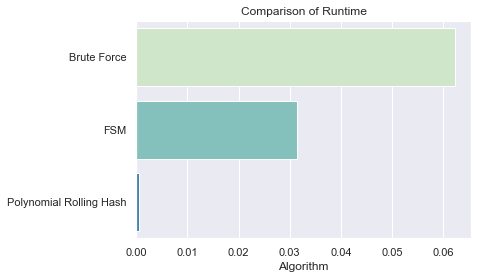

In [16]:
fig, ax = plt.subplots()

sb.barplot(data=summary_rt,x = runtimes, y=['Brute Force', 'FSM', 'Polynomial Rolling Hash'], palette=("GnBu"))
plt.title("Comparison of Runtime")
plt.xlabel("Algorithm")

## Conclusion

In conclusion, the Polynomial Hashing algorithm is the best among the 3 algorithms with the fastest execution time.

# References
* https://www.geeksforgeeks.org/implementation-of-hashing-with-chaining-in-python/
* https://www.tutorialspoint.com/python_data_structure/python_hash_table.htm
* https://www.tutorialspoint.com/data_structures_algorithms/hash_data_structure.htm
* https://brilliant.org/wiki/rabin-karp-algorithm/#:~:text=The%20best%2D%20and%20average%2Dcase,collision%20and%20therefore%20must%20check
* http://blog.chapagain.com.np/hash-table-implementation-in-python-data-structures-algorithms/
* https://programming.guide/hash-tables-complexity.html
* https://stackoverflow.com/questions/9214353/hash-table-runtime-complexity-insert-search-and-delete
* https://cp-algorithms.com/string/string-hashing.html